<a href="https://colab.research.google.com/github/ajal-krishna/student-final-score-predictor/blob/main/student_score_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# ===============================================================
#   Student Final Marks Predictor – Cleaned & Focused on Linear Regression
#   Platform: Google Colab
# ===============================================================

# ─── 1. Imports ────────────────────────────────────────────
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

from sklearn.metrics import confusion_matrix


In [23]:
# ─── 2. Load and Understand Dataset ─────────────────────────────
# Load the dataset (adjust path if needed)
df = pd.read_csv('/content/drive/MyDrive/dataset/Final_Marks_Data (1).csv')

print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:\n", df.head())
print("\nColumns and Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nDataset Statistics:\n", df.describe())

Dataset Shape: (2000, 7)

First 5 Rows:
   Student_ID  Attendance (%)  Internal Test 1 (out of 40)  \
0      S1000              84                           30   
1      S1001              91                           24   
2      S1002              73                           29   
3      S1003              80                           36   
4      S1004              84                           31   

   Internal Test 2 (out of 40)  Assignment Score (out of 10)  \
0                           36                             7   
1                           38                             6   
2                           26                             7   
3                           35                             7   
4                           37                             8   

   Daily Study Hours  Final Exam Marks (out of 100)  
0                  3                             72  
1                  3                             56  
2                  3                         

In [24]:
# ─── 3. Data Preprocessing ──────────────────────────────────────
# Remove unnecessary column
df = df.drop('Student_ID', axis=1)

# Separate features and target
X = df.drop('Final Exam Marks (out of 100)', axis=1)
y = df['Final Exam Marks (out of 100)']

print("Features Shape:", X.shape)
print("Target Shape:", y.shape)
print("\nFeature Columns:", X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTrain Features Shape:", X_train.shape)
print("Test Features Shape:", X_test.shape)

# Feature scaling (kept for consistency, even if LinearRegression doesn't strictly need it)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print("\nSample Scaled Train Data:\n", X_train_scaled[:2])

Features Shape: (2000, 5)
Target Shape: (2000,)

Feature Columns: Index(['Attendance (%)', 'Internal Test 1 (out of 40)',
       'Internal Test 2 (out of 40)', 'Assignment Score (out of 10)',
       'Daily Study Hours'],
      dtype='object')

Train Features Shape: (1600, 5)
Test Features Shape: (400, 5)

Sample Scaled Train Data:
 [[ 0.40014193 -0.90061392 -0.08778761 -1.47907834  0.29234021]
 [ 0.52872741  0.40089046  1.00955755  1.46802669  1.91083274]]


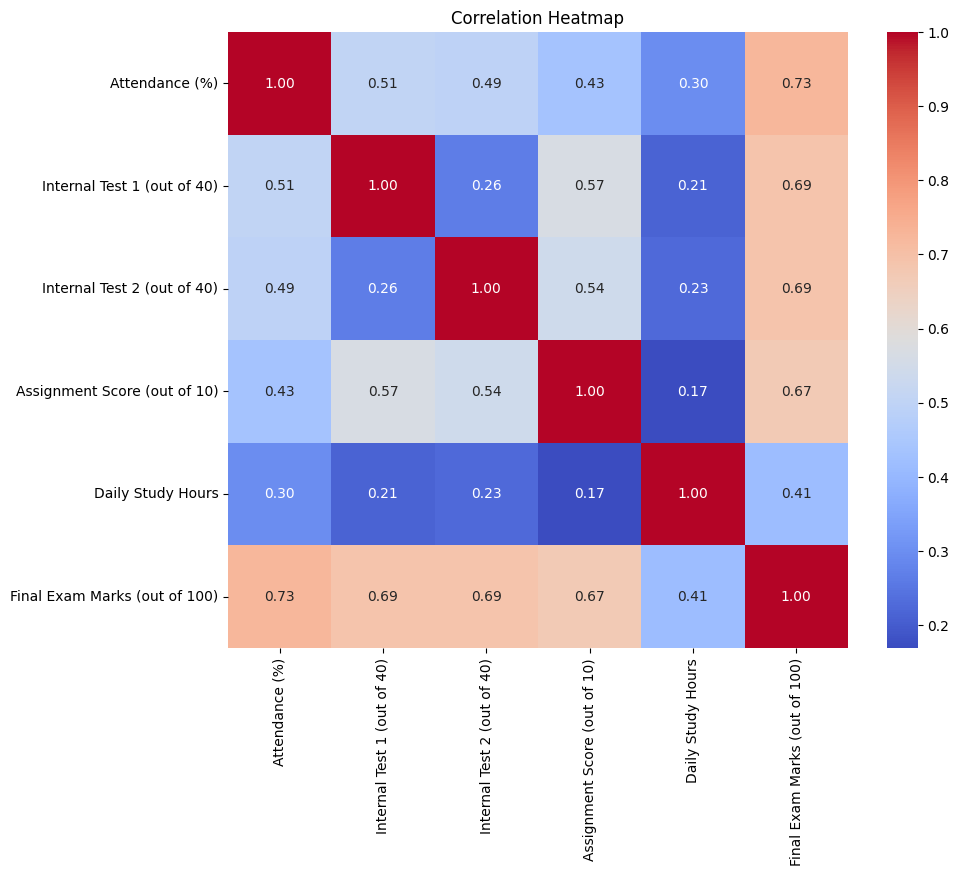

In [25]:
# ─── 4. Exploratory Data Analysis (EDA) ──────────────────────────
corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [26]:
# ─── 5. Model Training (Linear Regression only) ─────────────────
model = LinearRegression()

# LinearRegression uses unscaled data
model.fit(X_train, y_train)

print("Model Trained:", type(model).__name__)

Model Trained: LinearRegression



Predicted vs Actual (first 5):
       Actual  Predicted
1860      64  64.315781
353       52  55.325154
1333      61  65.682564
905       54  46.631086
1289      37  41.746401

MAE:  3.67  (average error per prediction)
MSE:  21.33
RMSE: 4.62  (error in same units as marks)
R²:   0.83   (proportion of variance explained)


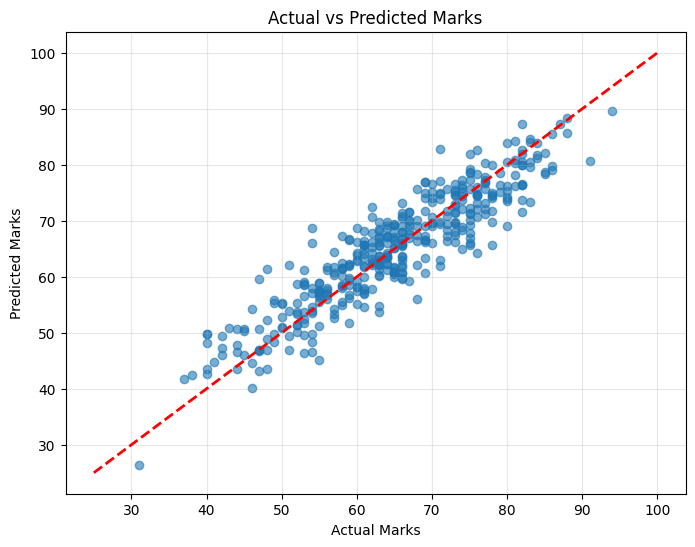

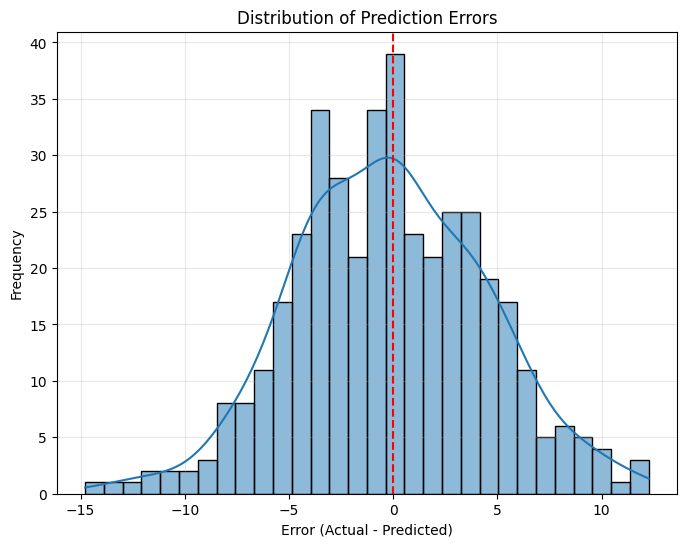

In [27]:
# ─── 6. Predictions & Evaluation ────────────────────────────────
y_pred = model.predict(X_test)

# Show sample predictions
comparison = pd.DataFrame({'Actual': y_test[:5], 'Predicted': y_pred[:5]})
print("\nPredicted vs Actual (first 5):\n", comparison)

# Performance metrics
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

print(f"\nMAE:  {mae:.2f}  (average error per prediction)")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}  (error in same units as marks)")
print(f"R²:   {r2:.2f}   (proportion of variance explained)")

# ─── 7. Visualizations ──────────────────────────────────────────
# Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Marks')
plt.ylabel('Predicted Marks')
plt.title('Actual vs Predicted Marks')
plt.grid(True, alpha=0.3)
plt.show()

# Error distribution
errors = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(errors, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

In [32]:
#___ 8.UI________________________________________________________

# ─── Custom CSS for modern look ────────────────────────────────
display(HTML("""
<style>
    .header {
        background: linear-gradient(135deg, #6366f1 0%, #8b5cf6 100%);
        color: white;
        padding: 28px 24px;
        border-radius: 16px 16px 0 0;
        text-align: center;
        box-shadow: 0 6px 20px rgba(99,102,241,0.25);
        margin-bottom: 0;
    }
    .header h2 {
        margin: 0;
        font-size: 2.1rem;
        font-weight: 700;
        letter-spacing: -0.5px;
    }
    .header p {
        margin: 8px 0 0;
        opacity: 0.9;
        font-size: 1.05rem;
    }
    .card {
        background: white;
        border-radius: 0 0 16px 16px;
        padding: 28px 32px;
        box-shadow: 0 10px 30px rgba(0,0,0,0.12);
        border: 1px solid #e5e7eb;
        max-width: 720px;
        margin: 0 auto;
    }
    .slider-label {
        font-weight: 600;
        color: #374151;
        margin-bottom: 6px;
    }
    .predict-btn {
        background: #4f46e5 !important;
        color: white !important;
        font-weight: bold !important;
        padding: 14px 32px !important;
        border-radius: 12px !important;
        border: none !important;
        transition: all 0.25s ease;
        box-shadow: 0 4px 14px rgba(79,70,229,0.3) !important;
    }
    .predict-btn:hover {
        transform: translateY(-2px);
        box-shadow: 0 8px 24px rgba(79,70,229,0.4) !important;
        background: #4338ca !important;
    }
    .output-area {
        background: #f8fafc;
        border: 1px solid #e2e8f0;
        border-radius: 12px;
        padding: 24px;
        margin-top: 24px;
        font-family: system-ui, sans-serif;
    }
    .score-box {
        font-size: 2.4rem;
        font-weight: 800;
        text-align: center;
        margin: 16px 0;
        padding: 16px;
        border-radius: 12px;
    }
    .high { background: #d1fae5; color: #065f46; }
    .medium { background: #fef3c7; color: #92400e; }
    .low { background: #fee2e2; color: #991b1b; }
</style>
"""))

# ─── Widgets ────────────────────────────────────────────────────
model_label = widgets.HTML("<div class='slider-label'>Select Model (currently using Linear Regression)</div>")

attendance = widgets.FloatSlider(
    min=0, max=100, step=1, value=85,
    description='', continuous_update=False,
    layout=widgets.Layout(width='100%'),
    readout_format='.0f'
)

test1 = widgets.FloatSlider(
    min=0, max=40, step=0.5, value=32,
    description='', continuous_update=False,
    layout=widgets.Layout(width='100%')
)

test2 = widgets.FloatSlider(
    min=0, max=40, step=0.5, value=34,
    description='', continuous_update=False,
    layout=widgets.Layout(width='100%')
)

assign = widgets.FloatSlider(
    min=0, max=10, step=0.5, value=8,
    description='', continuous_update=False,
    layout=widgets.Layout(width='100%')
)

study = widgets.FloatSlider(
    min=0, max=10, step=0.5, value=4,
    description='', continuous_update=False,
    layout=widgets.Layout(width='100%')
)

predict_btn = widgets.Button(
    description='Predict Final Score',
    button_style='',
    layout=widgets.Layout(width='auto', padding='0 32px'),
    icon='calculator'
)

output = widgets.Output(layout=widgets.Layout(margin='16px 0 0 0'))

# ─── Prediction logic ───────────────────────────────────────────
def on_predict(b):
    with output:
        clear_output()

        # Use only Linear Regression
        model = LinearRegression()
        model.fit(X, y)  # full data for demo/prediction

        inputs = pd.DataFrame([{
            'Attendance (%)': attendance.value,
            'Internal Test 1 (out of 40)': test1.value,
            'Internal Test 2 (out of 40)': test2.value,
            'Assignment Score (out of 10)': assign.value,
            'Daily Study Hours': study.value
        }])

        pred = model.predict(inputs)[0]
        pred_rounded = round(pred, 1)

        # Style based on score
        if pred >= 75:
            cls = 'high'
            msg = "🌟 Outstanding – Excellent trajectory!"
        elif pred >= 60:
            cls = 'medium'
            msg = "👍 Solid performance – good consistency"
        else:
            cls = 'low'
            msg = "⚠️ Room for improvement – let's work on it!"

        print("Prediction Ready!")
        display(HTML(f"""
        <div class="score-box {cls}">
            {pred_rounded} / 100
        </div>
        <p style="text-align:center; font-size:1.15rem; margin:12px 0;">{msg}</p>
        <hr style="border:0; border-top:1px solid #e5e7eb; margin:20px 0;">
        <table style="width:100%; font-size:1.05rem;">
            <tr><td><b>Attendance</b></td><td>{attendance.value:.0f}%</td></tr>
            <tr><td><b>Internal Test 1</b></td><td>{test1.value:.1f}/40</td></tr>
            <tr><td><b>Internal Test 2</b></td><td>{test2.value:.1f}/40</td></tr>
            <tr><td><b>Assignment</b></td><td>{assign.value:.1f}/10</td></tr>
            <tr><td><b>Daily Study</b></td><td>{study.value:.1f} hours</td></tr>
        </table>
        """))

predict_btn.on_click(on_predict)

# ─── Layout ─────────────────────────────────────────────────────
inputs_group = widgets.VBox([
    widgets.HTML("<div class='slider-label'>Attendance (%) </div>"), attendance,
    widgets.HTML("<div class='slider-label'>Internal Test 1 (out of 40)</div>"), test1,
    widgets.HTML("<div class='slider-label'>Internal Test 2 (out of 40)</div>"), test2,
    widgets.HTML("<div class='slider-label'>Assignment Score (out of 10)</div>"), assign,
    widgets.HTML("<div class='slider-label'>Daily Study Hours</div>"), study,
], layout=widgets.Layout(grid_gap='16px'))

card = widgets.VBox([
    inputs_group,
    widgets.HBox([predict_btn], layout=widgets.Layout(justify_content='center', margin='28px 0 12px 0')),
    output
], layout=widgets.Layout(**{'class_': 'card'}))

header = widgets.HTML("""
<div class="header">
    <h2>Student Final Marks Predictor</h2>
    <p>Adjust values → get instant prediction</p>
</div>
""")

main_ui = widgets.VBox([header, card], layout=widgets.Layout(max_width='760px', margin='24px auto'))

display(main_ui)